# 01: Import

## 01-1: 라이브러리 및 폰트 설치

In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (14.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and direc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
import ast
import joblib
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from math import log

from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import log_loss

from datetime import date

plt.rcParams['font.family'] = 'NanumBarunGothic'  # 나눔바른고딕 적용
plt.rcParams['font.size'] = 15 # 글자 크기import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

## 01-2: 데이터

In [ ]:
# 구글 드라이브에 있는 파일 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 데이터 로드
train = pd.read_csv('/content/gdrive/MyDrive/Dscover 가이드 D조/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Dscover 가이드 D조/test.csv')
submit = pd.read_csv('/content/gdrive/MyDrive/Dscover 가이드 D조/sample_submission.csv')

# 02: EDA

## 02-1: 데이터 확인

###컬럼 구분

In [ ]:
numerical_columns = ['보증금', '월세', '전용면적', '해당층', '총층',
                     '방수', '욕실수', '총주차대수', '관리비']
categorical_columns = ['매물확인방식', '방향', '주차가능여부',
                       '중개사무소', '제공플랫폼']
date_columns = ['게재일']
target_column = ['허위매물여부']

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비']
Categorical Columns: ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼']


###train 데이터 확인

In [ ]:
train.shape

(2452, 17)

In [ ]:
train.head(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [ ]:
train.describe()

# median, mean 으로 어느정도 파악 가능
## 총층, 총주차대수, 관리비 약간 skewed 의심

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977,0.121533
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185,0.326813
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,0.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000


In [ ]:
# 각 열의 고유 값과 각 값의 개수 확인

for column in train.columns:
    print(f"Column: {column}")
    print(train[column].value_counts())
    print("-" * 40)

Column: ID
ID
TRAIN_2451    1
TRAIN_0000    1
TRAIN_0001    1
TRAIN_0002    1
TRAIN_2435    1
             ..
TRAIN_0008    1
TRAIN_0007    1
TRAIN_0006    1
TRAIN_0005    1
TRAIN_0004    1
Name: count, Length: 2452, dtype: int64
----------------------------------------
Column: 매물확인방식
매물확인방식
현장확인    1705
전화확인     382
서류확인     365
Name: count, dtype: int64
----------------------------------------
Column: 보증금
보증금
28000000.0     18
10500000.0     15
24500000.0     15
17000000.0     14
170500000.0    14
               ..
154000000.0     1
386000000.0     1
180500000.0     1
130500000.0     1
401000000.0     1
Name: count, Length: 426, dtype: int64
----------------------------------------
Column: 월세
월세
250000    67
150000    61
100000    56
550000    46
390000    44
          ..
20000     19
10000     16
40000     10
30000      8
0          4
Name: count, Length: 76, dtype: int64
----------------------------------------
Column: 전용면적
전용면적
17.50    300
19.83     34
29.98     18
23.14     18
1

###test 데이터 확인

In [ ]:
test.shape

(613, 16)

In [ ]:
test.head(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03
3,TEST_003,서류확인,133000000.0,250000,31.35,5.0,6.0,남향,2.0,1.0,가능,NaN,5,C41wx1K6U9,B플랫폼,2024-09-19
4,TEST_004,현장확인,108000000.0,380000,23.14,2.0,3.0,남향,1.0,1.0,불가능,NaN,0,Z68ZJ6F6L4,A플랫폼,2024-11-10


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


In [ ]:
test.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
count,6.130000e+02,613.000000,429.000000,563.000000,611.000000,611.000000,611.000000,438.000000,613.000000
mean,1.493581e+08,380619.902121,27.763800,4.486679,7.692308,1.400982,1.034370,20.292237,5.435563
std,1.089524e+08,208720.676924,8.088812,3.315189,4.643019,0.490499,0.182327,22.873775,5.221359
min,8.500000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,6.300000e+07,190000.000000,20.360000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000
50%,1.370000e+08,380000.000000,27.220000,3.000000,6.000000,1.000000,1.000000,11.500000,5.000000
75%,1.985000e+08,560000.000000,33.050000,5.000000,10.000000,2.000000,1.000000,31.750000,9.000000
max,4.595000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,169.000000,23.000000


In [ ]:
# 각 열의 고유 값과 각 값의 개수 확인

for column in train.columns:
    print(f"Column: {column}")
    print(train[column].value_counts())
    print("-" * 40)

Column: ID
ID
TRAIN_2451    1
TRAIN_0000    1
TRAIN_0001    1
TRAIN_0002    1
TRAIN_2435    1
             ..
TRAIN_0008    1
TRAIN_0007    1
TRAIN_0006    1
TRAIN_0005    1
TRAIN_0004    1
Name: count, Length: 2452, dtype: int64
----------------------------------------
Column: 매물확인방식
매물확인방식
현장확인    1705
전화확인     382
서류확인     365
Name: count, dtype: int64
----------------------------------------
Column: 보증금
보증금
28000000.0     18
10500000.0     15
24500000.0     15
17000000.0     14
170500000.0    14
               ..
154000000.0     1
386000000.0     1
180500000.0     1
130500000.0     1
401000000.0     1
Name: count, Length: 426, dtype: int64
----------------------------------------
Column: 월세
월세
250000    67
150000    61
100000    56
550000    46
390000    44
          ..
20000     19
10000     16
40000     10
30000      8
0          4
Name: count, Length: 76, dtype: int64
----------------------------------------
Column: 전용면적
전용면적
17.50    300
19.83     34
29.98     18
23.14     18
1

###데이터 분포 확인

* 히스토그램 또는 커널 밀도 추정 (KDE)을 사용하여 각 변수의 분포를 시각화

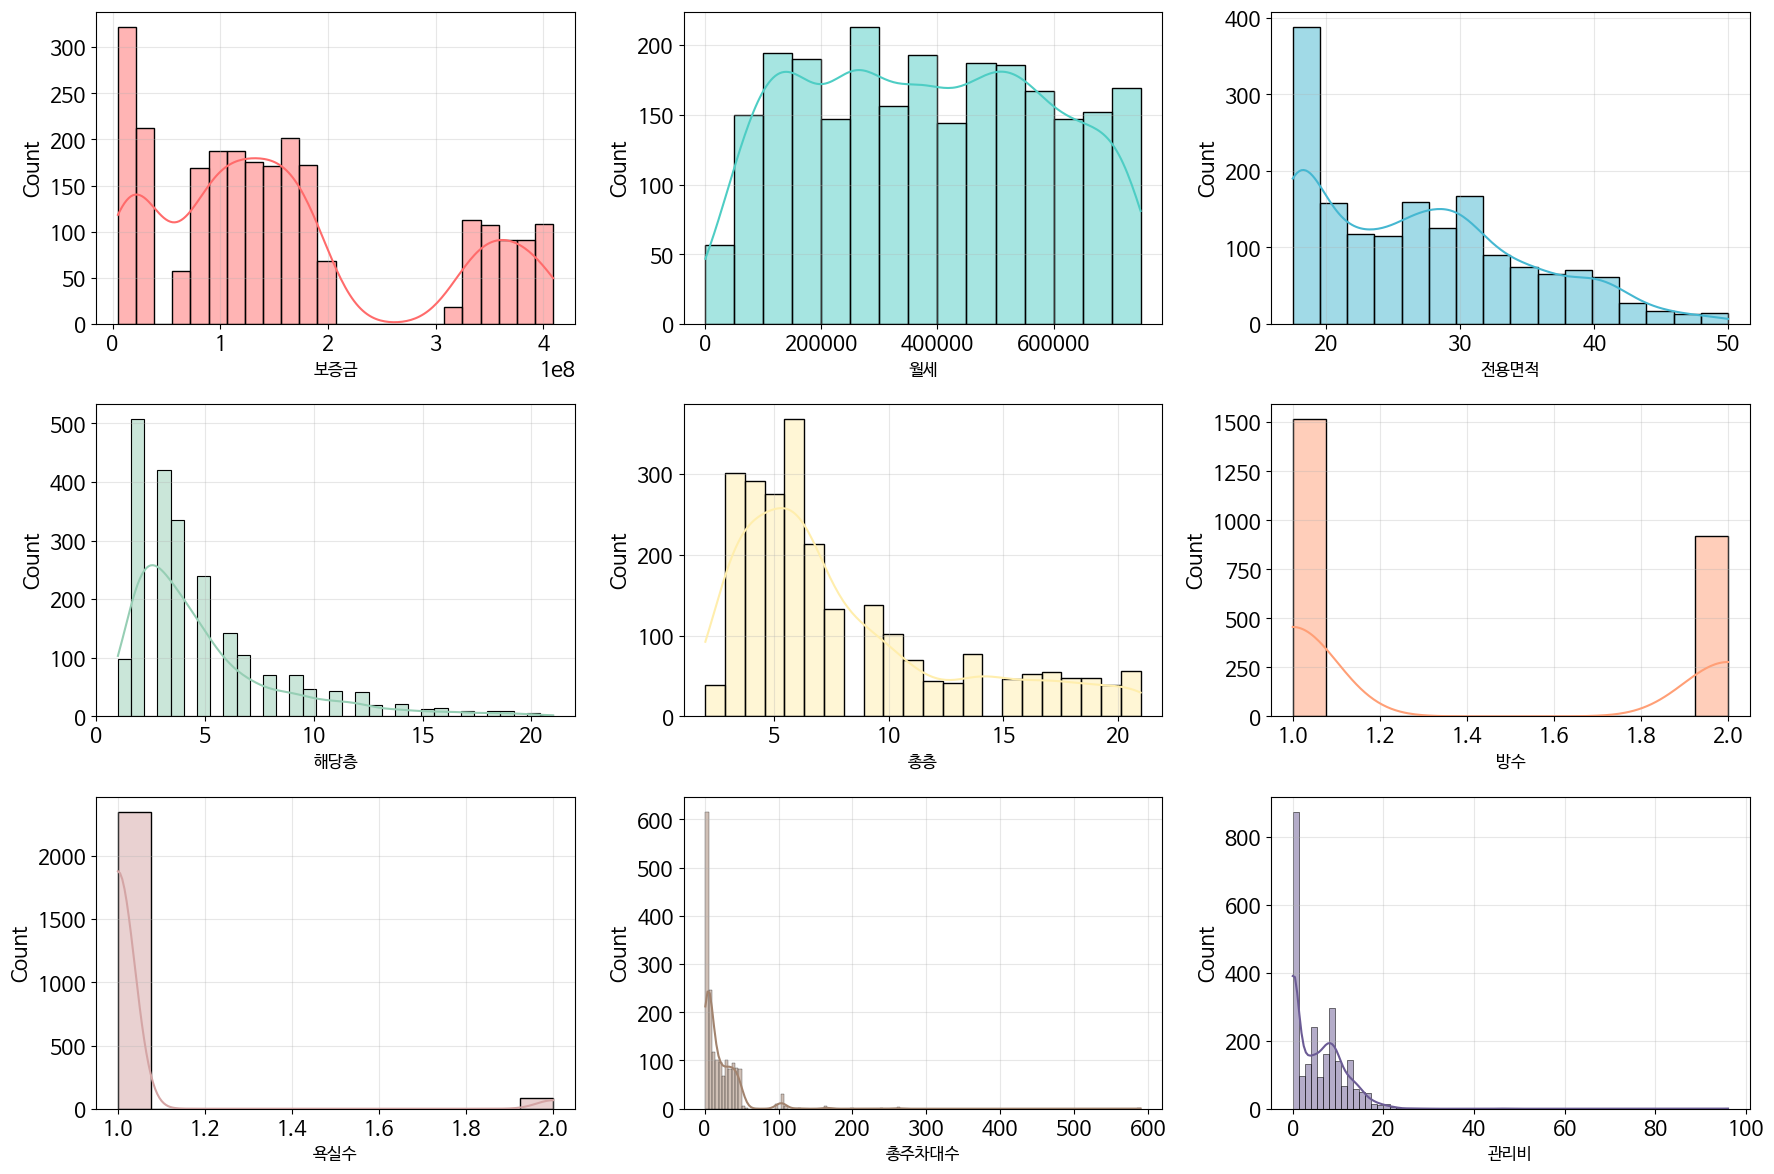

In [ ]:
# 히스토그램 + KDE

col = numerical_columns
# numerical_columns = ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비']

# 커스텀 색상 리스트 (9개 색상 지정)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD',
          '#FF9F76', '#D4A5A5', '#A2836E', '#6B5B95']

plt.figure(figsize=(18, 12))

for i, (column, color) in enumerate(zip(col, colors), 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[column], kde=True, color=color, edgecolor='black')  # 색상 적용
    plt.xlabel(column, fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

- 총층, 해당층, 총주차대수, 관리비 => log변환
-  방수, 욕실수 통합
- 방수 + 욕실수 -> 방개수 / 해당층/총층 -> 층수비율  정규화
- 보증금, 월세, 총주차대수, 관리비 이상치 제거


- 모든 컬럼에 대해 정규성 없다고 판단

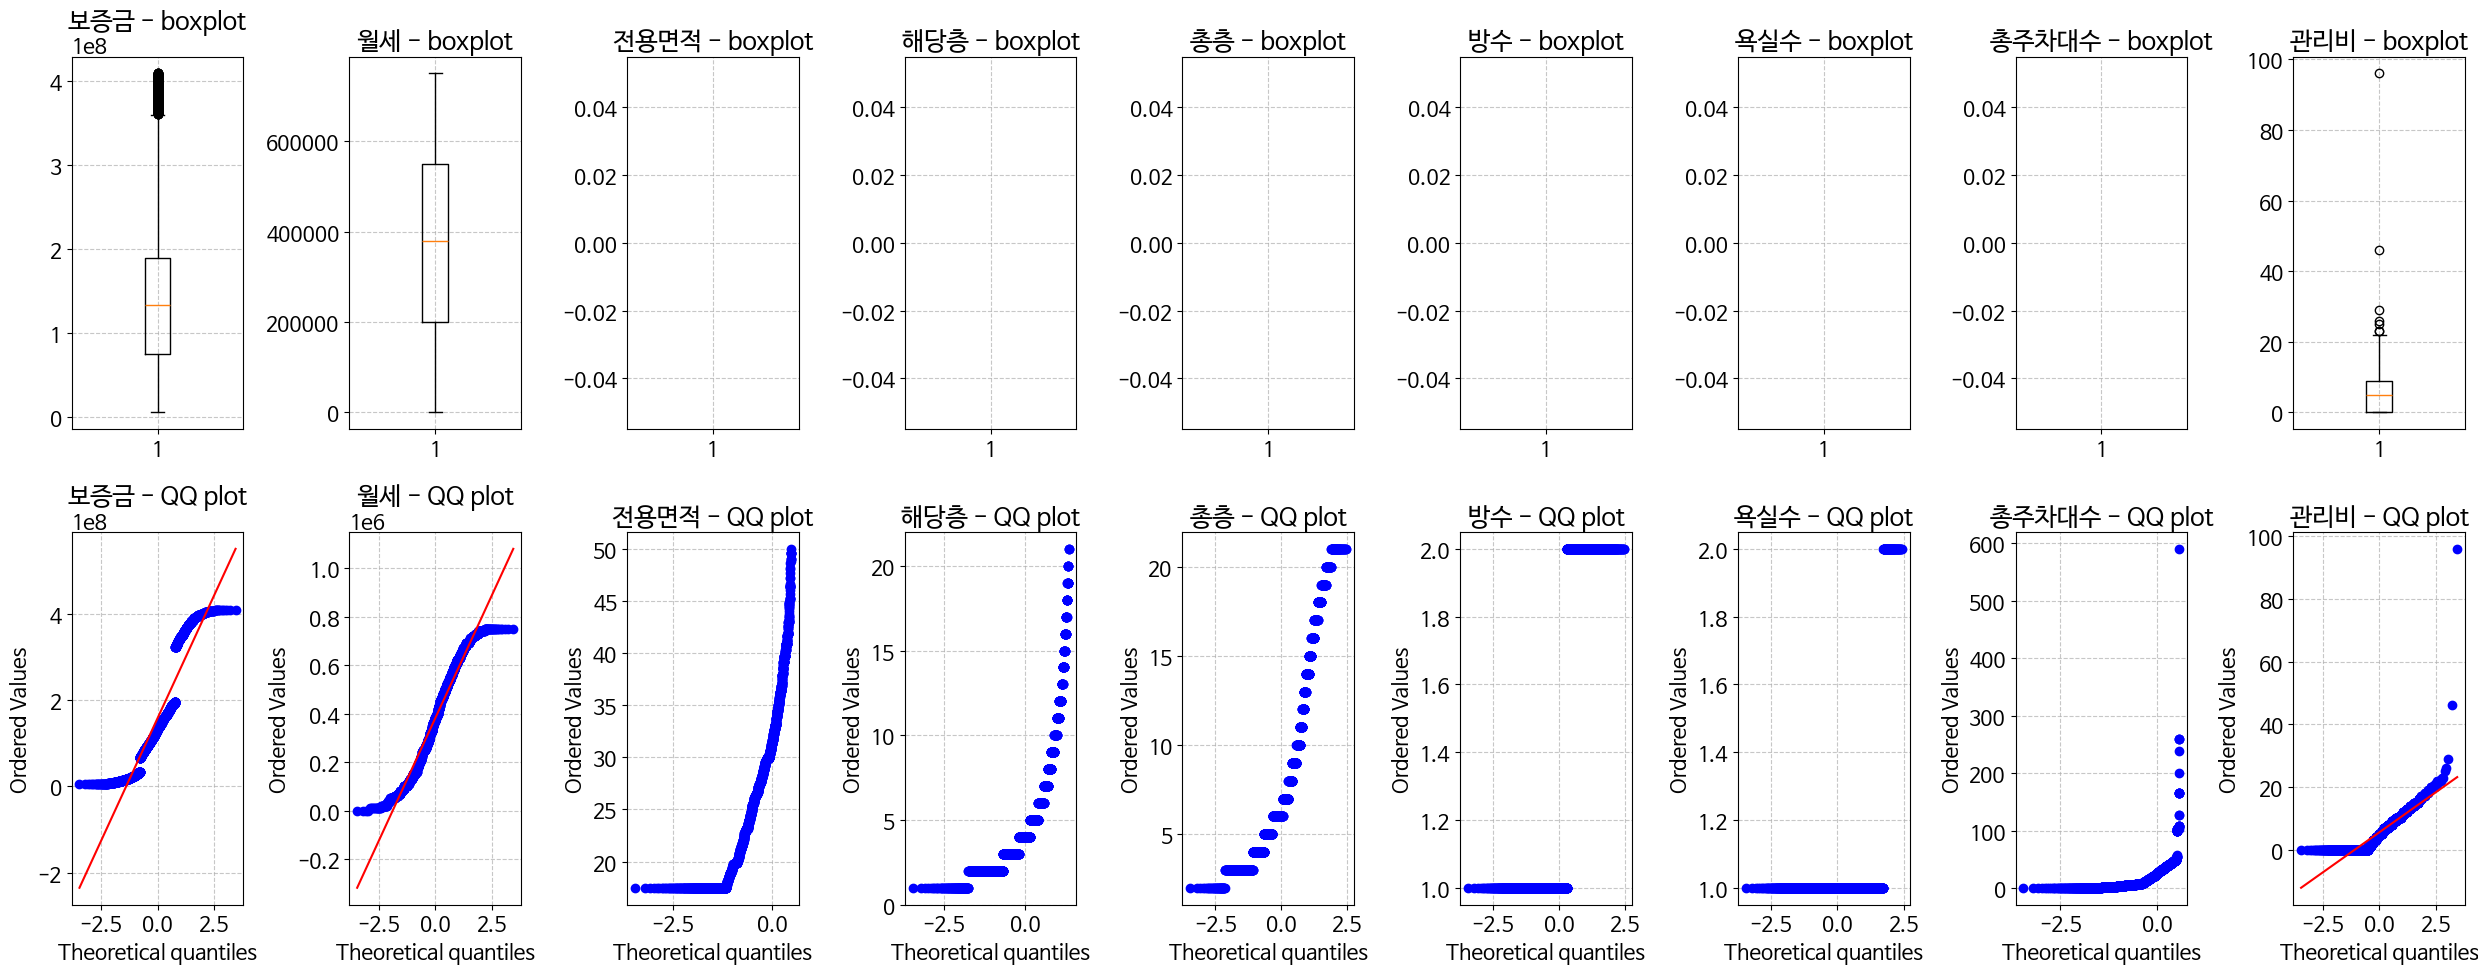

In [ ]:
from scipy.stats import probplot

columns_to_check = numerical_columns

# 2행 6열의 그리드로 수정
fig, axes = plt.subplots(2, 9, figsize=(25, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i, col in enumerate(columns_to_check):
    # 데이터 추출
    data = train[col]

    # 박스플롯
    axes[0][i].boxplot(data)
    axes[0][i].set_title(f'{col} - boxplot')
    axes[0][i].grid(True, linestyle='--', alpha=0.7)

    # 정규성 검정을 위한 QQ 플롯
    probplot(data, plot=axes[1][i])
    axes[1][i].set_title(f'{col} - QQ plot')
    axes[1][i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-19-d20963a471e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='허위매물여부', y='보증금', data=train, ax=ax1, palette='viridis')


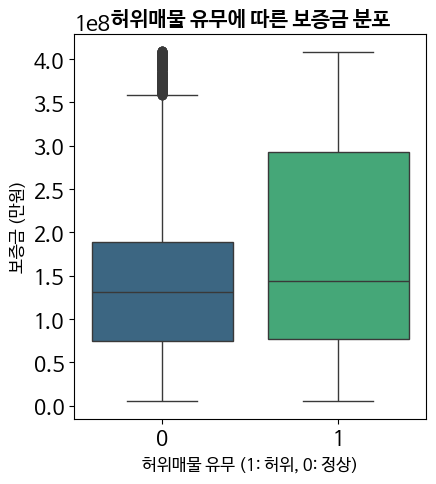

In [ ]:
#박스플롯

# 박스플롯 그리기
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)

# train 데이터프레임에서 '허위매물여부'와 '보증금' 열을 사용
sns.boxplot(x='허위매물여부', y='보증금', data=train, ax=ax1, palette='viridis')

# 그래프 제목 및 라벨 설정
ax1.set_title('허위매물 유무에 따른 보증금 분포', fontsize=15, fontweight='bold')
ax1.set_xlabel('허위매물 유무 (1: 허위, 0: 정상)', fontsize=12)
ax1.set_ylabel('보증금 (만원)', fontsize=12)

# 그래프 출력
plt.show()

#- 허위매물 유무에 따른 보증금 분포 -> 이거 보면 결측값을 중앙값으로 하면 안될듯(변별력이 없어보임)

##02-2: 결측치 확인

In [ ]:
# 결측치 확인
train.isnull().sum()

# 결측값 있는 부분 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수

,0
ID,0
매물확인방식,0
보증금,0
월세,0
전용면적,787
해당층,229
총층,16
방향,0
방수,16
욕실수,18


##02-3: 이상치 확인

In [ ]:
# 수치형 변수 리스트 (수정 필요)
numeric_columns = numerical_columns

# 이상치 계산
outliers_iqr = pd.DataFrame()

# 각 수치형 변수에 대해 IQR을 계산하고 이상치 여부를 판별
for col in numeric_columns:
    # Q1, Q3 계산
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)

    # IQR 계산
    IQR = Q3 - Q1

    # 이상치 기준 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 판별 (값이 lower_bound보다 작거나 upper_bound보다 큰 경우)
    outliers_iqr[col] = (train[col] < lower_bound) | (train[col] > upper_bound)

# 이상치 값 출력
outliers_iqr_summary = outliers_iqr.sum()
print(outliers_iqr_summary)

보증금      279
월세         0
전용면적       0
해당층      104
총층        95
방수         0
욕실수       84
총주차대수     60
관리비        7
dtype: int64


* deposit: 이상치 인정
* floor: 이상치 인정
* total_floors: 이상치 인정 (컬럼 제거 예정)
* bathrooms: 이상치(2) 인정
* total_parking_spaces: 최댓값 1개가 과도하게 높음 -> 이상치 대체 예정
* maintenance_fee: 이상치 인정

##02-4: 데이터 불균형 확인

In [ ]:
# 허위매물 개수 확인
count = train['허위매물여부'].value_counts()
print(count)

# 총 298개
# 허위매물여부가 1인 비율 소수점 2째까지 출력
ratio = train['허위매물여부'].value_counts()[1] / len(train) * 100
print('train set 에서 전체 매물이 허위매물인 경우',round(ratio, 2),'%')

허위매물여부
0    2154
1     298
Name: count, dtype: int64
train set 에서 전체 매물이 허위매물인 경우 12.15 %


<ipython-input-23-ccf434c862fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train['허위매물여부'], palette = 'pastel')


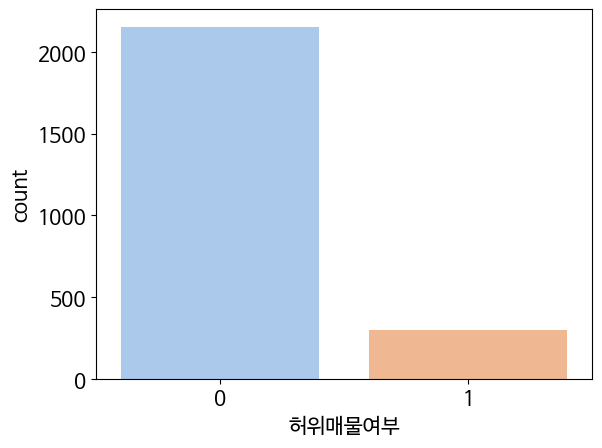

In [ ]:
sns.countplot(x=train['허위매물여부'], palette = 'pastel')

plt.show()

In [ ]:
# 타겟 변수 허위매물여부 값 분포 확인
class_distribution = train['허위매물여부'].value_counts()

# 불균형 비율 계산
majority_class_count = class_distribution.max()
minority_class_count = class_distribution.min()
imbalance_ratio = majority_class_count / minority_class_count

print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 7.228187919463087


- target 불균형 -> oversampling 진행
  - smote
  - smoteen

# 03: 전처리 및 Feature Engineering

##03-1: 결측치 및 이상치 처리

In [ ]:
#(1)결측치처리
# 전용면적

# 1. 방개수별 전용면적 중앙값 계산
median_area_bath1 = train[train['방수'] == 1]['전용면적'].median()
median_area_bath2 = train[train['방수'] == 2]['전용면적'].median()
overall_median_area = train['전용면적'].median()

print("[방개수별 전용면적 중앙값 비교]")
print(f"✅ 전체 전용면적 중앙값: {overall_median_area:.2f}㎡")
print(f"✅ 방수 1의 전용면적 중앙값: {median_area_bath1:.2f}㎡")
print(f"✅ 방수 2의 전용면적 중앙값: {median_area_bath2:.2f}㎡")

# 2. 조건별 결측치 처리
# 조건 1: 방수 & 전용면적 모두 결측 → 전체 중앙값
case1_mask = train['전용면적'].isna() & train['방수'].isna()
train.loc[case1_mask, '전용면적'] = overall_median_area

# 조건 2: 전용면적 결측 & 방수=1 → 방수1 중앙값
case2_mask = train['전용면적'].isna() & (train['방수'] == 1)
train.loc[case2_mask, '전용면적'] = median_area_bath1

# 조건 3: 전용면적 결측 & 방수=2 → 방수2 중앙값
case3_mask = train['전용면적'].isna() & (train['방수'] == 2)
train.loc[case3_mask, '전용면적'] = median_area_bath2

print("\n[전용면적 결측치 처리 결과]")
print(f"✅ 조건1 적용 (전체 중앙값): {case1_mask.sum()}건")
print(f"✅ 조건2 적용 (방수1 기준): {case2_mask.sum()}건")
print(f"✅ 조건3 적용 (방수2 기준): {case3_mask.sum()}건")
print(f"✅ 최종 결측치: {train['전용면적'].isna().sum()}건 (0이어야 함)")

[방개수별 전용면적 중앙값 비교]
✅ 전체 전용면적 중앙값: 26.40㎡
✅ 방수 1의 전용면적 중앙값: 23.14㎡
✅ 방수 2의 전용면적 중앙값: 29.93㎡

[전용면적 결측치 처리 결과]
✅ 조건1 적용 (전체 중앙값): 16건
✅ 조건2 적용 (방수1 기준): 375건
✅ 조건3 적용 (방수2 기준): 396건
✅ 최종 결측치: 0건 (0이어야 함)


In [ ]:
# 해당층

# 조건 1: 해당층이 결측치 & 총층이 있는 경우 → 해당층 = 총층 / 2 (반올림)
case1_mask = train['해당층'].isna() & train['총층'].notna()
train.loc[case1_mask, '해당층'] = np.round(train.loc[case1_mask, '총층'] / 2)

# 조건 2: 해당층 & 총층 모두 결측치 → 해당층 = 전체 해당층 중앙값
case2_mask = train['해당층'].isna() & train['총층'].isna()
median_current_floor = train['해당층'].median()  # 결측치 제외한 중앙값
train.loc[case2_mask, '해당층'] = median_current_floor

# 결과 확인

print("[해당층 결측치 처리 결과]")
print(f"✅ 조건1 적용 (층층 유): {case1_mask.sum()}건")
print(f"✅ 조건2 적용 (총층 무): {case2_mask.sum()}건")
print(f"\n✅ 결측치 개수: {train['해당층'].isna().sum()} (0이어야 함)")

[해당층 결측치 처리 결과]
✅ 조건1 적용 (층층 유): 213건
✅ 조건2 적용 (총층 무): 16건

✅ 결측치 개수: 0 (0이어야 함)


In [ ]:
# 총층

# 총층 값의 중앙값으로 대체
total_floor_median = np.round(train['총층'].median())
train['총층'] = train['총층'].fillna(total_floor_median)

# 결과 확인
print("[총층 결측치 처리 결과]")
print(f"✅ 사용된 중앙값: {total_floor_median}")
print(f"✅ 결측치 개수: {train['총층'].isna().sum()} (0이어야 함)")

[총층 결측치 처리 결과]
✅ 사용된 중앙값: 6.0
✅ 결측치 개수: 0 (0이어야 함)


In [ ]:
filtered_df = train[train['방수'] == 2]
bathroom_ratio = filtered_df['욕실수'].value_counts(normalize = True)

# 방수가 2인 경우 욕실수의 비율

prob_1 = bathroom_ratio.get(1, 0)  # 욕실 수=1의 확률 (없으면 0 반환)
prob_2 = bathroom_ratio.get(2, 0)  # 욕실 수=2의 확률

print(f"방수가 2인 경우 욕실 수=1 일 확률: {prob_1}")
print(f"방수가 2인 경우 욕실 수=2 일 확률: {prob_2}")

# 방수가 2일때 욕실수의 평균 값
mean_bathroom = train[train['방수'] == 2]['욕실수'].mean()
print(f"{mean_bathroom:.3f}")

방수가 2인 경우 욕실 수=1 일 확률: 0.908695652173913
방수가 2인 경우 욕실 수=2 일 확률: 0.09130434782608696
1.091


In [ ]:
# 욕실수

# 조건 1: 욕실수 결측치 & 방수 값이 1 → 욕실수 = 1
condition1 = (train['욕실수'].isna()) & (train['방수'] == 1.0)
train.loc[condition1, '욕실수'] = 1.0

# 조건 2: 욕실수 결측치 & 방수 값이 2 → 욕실수 = 방수 2인 경우의 평균
condition2 = (train['욕실수'].isna()) & (train['방수'] == 2.0)
# 방수=2인 경우의 욕실수 평균
bathroom_mean_when_2 = round(train[train['방수'] == 2.0]['욕실수'].mean(), 2)
train.loc[condition2, '욕실수'] = bathroom_mean_when_2

# 조건 3: 욕실수 결측치 & 방수 결측치 → 욕실수 = 1
condition3 = (train['욕실수'].isna()) & (train['방수'].isna())
train.loc[condition3, '욕실수'] = 1.0

# 결과 확인
print(f"✅ 방수=2인 경우 욕실수 평균값: {bathroom_mean_when_2:.2f}")

print("\n[욕실수 결측치 처리 결과]")
print(f"✅ 조건1 적용 (방수 값이 1): {condition1.sum()}건")
print(f"✅ 조건2 적용 (방수 값이 2): {condition2.sum()}건")
print(f"✅ 조건3 적용 : {condition3.sum()}건")
print(f"✅ 처리 후 결측치: {train['욕실수'].isna().sum()}건 (0이어야 함)")

✅ 방수=2인 경우 욕실수 평균값: 1.09

[욕실수 결측치 처리 결과]
✅ 조건1 적용 (방수 값이 1): 1건
✅ 조건2 적용 (방수 값이 2): 1건
✅ 조건3 적용 : 16건
✅ 처리 후 결측치: 0건 (0이어야 함)


In [ ]:
# 방수

# 방수의 평균값으로 대체

bathroom_mean = np.round(train['방수'].mean(), 2)  # 평균값 계산 후 소수점 2자리 수에서 반올림
train['방수'] = train['방수'].fillna(bathroom_mean)  # 명시적 대입 방식

# 2. 결과 검증
print("[방수 결측치 처리 결과]")
print(f"✅ 사용된 평균값: {bathroom_mean:.2f}")
print(f"✅ 처리 후 결측치: {train['방수'].isna().sum()}건 (0이어야 함)")

[방수 결측치 처리 결과]
✅ 사용된 평균값: 1.38
✅ 처리 후 결측치: 0건 (0이어야 함)


In [ ]:
# 총주차대수
# 총주차대수의 중앙값으로 대체, 평균: 20.33, 중앙값 10 (편차가 크기에 중앙값으로 대체)

# 총주차대수 결측치 처리 (중앙값 사용)
parking_median = train['총주차대수'].median() # 중앙값 계산 (소수점 2자리 반올림)
train['총주차대수'] = train['총주차대수'].fillna(parking_median)  # 결측치 대체

print("[총주차대수 결측치 처리 결과]")
print(f"✅ 사용된 중앙값: {parking_median}")
print(f"✅ 처리 후 결측치: {train['총주차대수'].isna().sum()}건 (0이어야 함)")

[총주차대수 결측치 처리 결과]
✅ 사용된 중앙값: 10.0
✅ 처리 후 결측치: 0건 (0이어야 함)


In [ ]:
# (2) outlier
# 이상치 제거
# DBSCAN은 머신 러닝에 주로 사용되는 클러스터링 알고리즘
# Multi Dimension의 데이터를 밀도 기반으로 서로 가까운 데이터 포인트를 함께 그룹화하는 알고리즘
# 어느 Cluster에도 속하지 못한 데이터들을 Outlier로 판단
# dbscan은 거리 기반이므로 scaling 필요 -> standard scaling 사용
# 방수, 욕실수는 binary하므로 제외

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train[['보증금', '월세', '총주차대수', '관리비']])

# DBSCAN 실행
dbscan = DBSCAN(eps=2.5, min_samples=5) # eps 숫자 조절 가능 기성 2.5, 수빈 2.0 설정
clusters = dbscan.fit_predict(scaled_data)

# 노이즈(-1)만 필터링
train['cluster'] = clusters
train = train[train['cluster'] != -1].drop(columns=['cluster'])

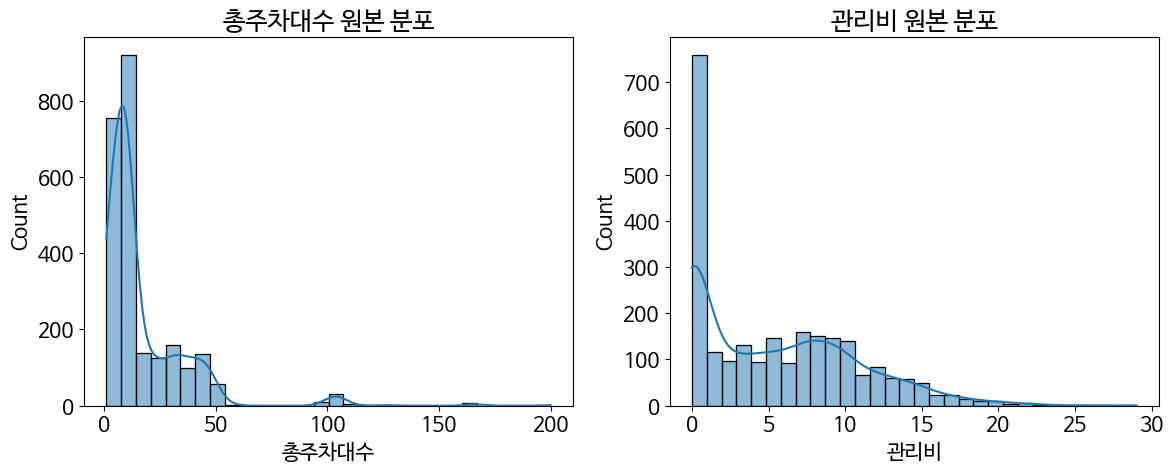

In [ ]:
# (3) 이상치 처리 - log 변환
# 원본 데이터 분포 확인
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train['총주차대수'], bins=30, kde=True)
plt.title('총주차대수 원본 분포')

plt.subplot(1, 2, 2)
sns.histplot(train['관리비'], bins=30, kde=True)
plt.title('관리비 원본 분포')

plt.tight_layout()
plt.show()

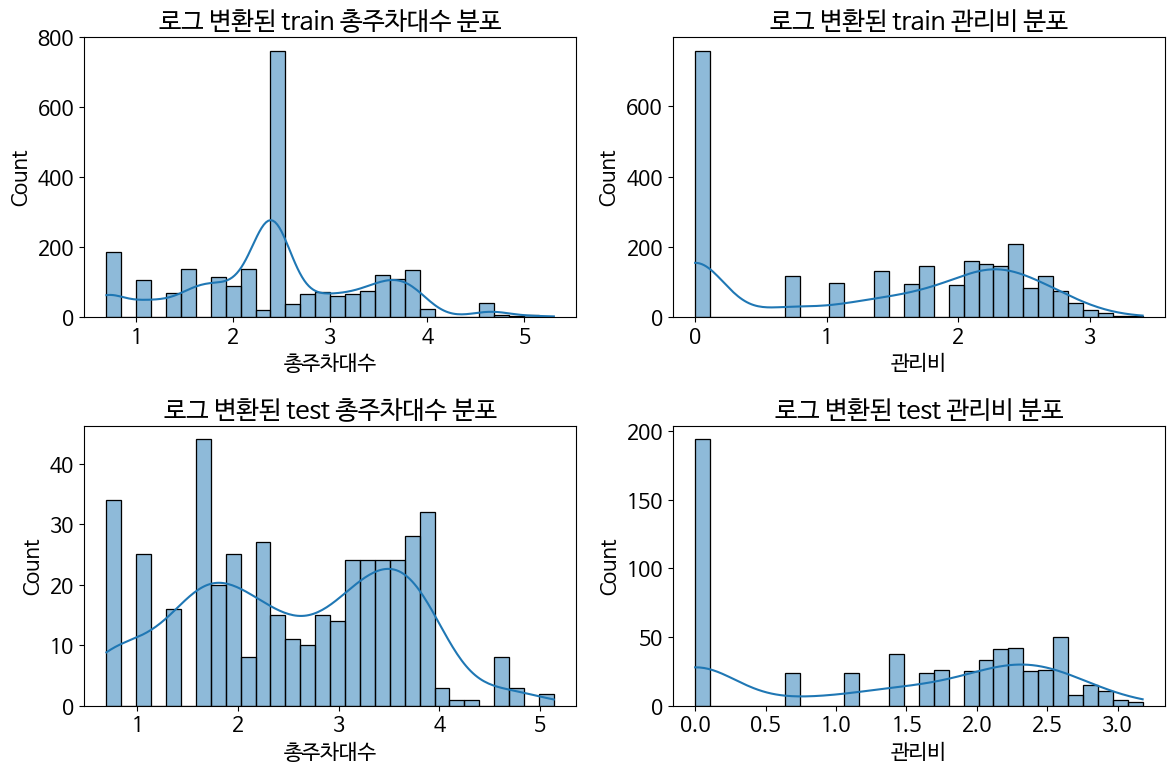

In [ ]:
# 로그 변환 적용 (log(1+x)로 0 값 처리)
train['총주차대수'] = np.log1p(train['총주차대수'])
test['총주차대수'] = np.log1p(test['총주차대수'])

train['관리비'] = np.log1p(train['관리비'])
test['관리비'] = np.log1p(test['관리비'])

# 변환된 데이터 분포 확인
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(train['총주차대수'], bins=30, kde=True)
plt.title('로그 변환된 train 총주차대수 분포')

plt.subplot(2, 2, 2)
sns.histplot(train['관리비'], bins=30, kde=True)
plt.title('로그 변환된 train 관리비 분포')

plt.subplot(2, 2, 3)
sns.histplot(test['총주차대수'], bins=30, kde=True)
plt.title('로그 변환된 test 총주차대수 분포')

plt.subplot(2, 2, 4)
sns.histplot(test['관리비'], bins=30, kde=True)
plt.title('로그 변환된 test 관리비 분포')

plt.tight_layout()
plt.show()

In [ ]:
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
1,TRAIN_0001,현장확인,170500000.0,200000,29.93,3.0,4.0,남동향,2.0,1.0,불가능,2.397895,0.000000,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,23.14,2.0,3.0,동향,1.0,1.0,불가능,2.397895,0.000000,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,가능,2.639057,2.397895,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,29.93,3.0,3.0,동향,2.0,1.0,불가능,2.397895,0.000000,N45gM0M7R0,B플랫폼,2024-06-25,1
5,TRAIN_0005,전화확인,153000000.0,530000,29.50,2.0,3.0,남향,2.0,1.0,가능,0.693147,0.000000,Q42YF3Y0I2,A플랫폼,2024-09-12,0


##03-2: Feature Engineering

### Feature 수정 및 추가

In [ ]:
# 수빈 ver + 기성 ver
'''
- feature 변경
  - 시각화 결과, 게재일에서 '일'은 중요하지 않으므로 '연도','월'만 사용
   - 이때, 연도와 월을 별도로 두지 않고 yyyymm형태로 합쳐서 사용한다! (시간 데이터)
- feature 추가
  - 중개사무소 '위험도' 추가
  - feature_importances를 확인하면 중개사무소의 중요도가 높음
  - 이에 따라, 추가 변수 생성
- log 변환
  - 총층, 해당층, 총주차대수, 관리비
- encoding
  - label encoding 사용
  - 순서로 인식할 수 있으나, xgboost는 트리기반이므로 문제 없음
  '''

"\n- feature 변경\n  - 시각화 결과, 게재일에서 '일'은 중요하지 않으므로 '연도','월'만 사용\n   - 이때, 연도와 월을 별도로 두지 않고 yyyymm형태로 합쳐서 사용한다! (시간 데이터)\n- feature 추가\n  - 중개사무소 '위험도' 추가\n  - feature_importances를 확인하면 중개사무소의 중요도가 높음\n  - 이에 따라, 추가 변수 생성\n- log 변환\n  - 총층, 해당층, 총주차대수, 관리비\n- encoding\n  - label encoding 사용\n  - 순서로 인식할 수 있으나, xgboost는 트리기반이므로 문제 없음\n  "

In [ ]:
# feature 엔지니어링 -> 방_개수, 층수_비율

train['방개수'] = train['방수'] +  train['욕실수']
train['층수비율'] = train['해당층'] / train['총층'] # 층수 정규화

test['방개수'] = test['방수'] +  test['욕실수']
test['층수비율'] = test['해당층'] / test['총층'] # 층수 정규화

train = train.drop(['총층','해당층','방수','욕실수'], axis=1)
test = test.drop(['총층','해당층','방수','욕실수'], axis=1)

In [ ]:
# 연도 - 월 조합 생성
train['게재일'] = pd.to_datetime(train['게재일'])
test['게재일'] = pd.to_datetime(test['게재일'])

# train 데이터
train['년월'] = train['게재일'].dt.year * 100 + train['게재일'].dt.month  #yyyymm
train['일'] = train['게재일'].dt.day

# test 데이터
test['년월'] = test['게재일'].dt.year * 100 + test['게재일'].dt.month
test['일'] = test['게재일'].dt.day

print(train[['게재일', '년월']].head())

         게재일      년월
1 2024-12-26  202412
2 2024-11-28  202411
3 2024-11-26  202411
4 2024-06-25  202406
5 2024-09-12  202409


In [ ]:
'''
train['게재일'] = pd.to_datetime(train['게재일'])
test['게재일'] = pd.to_datetime(test['게재일'])

# 1. 연도, 월, 일 추출
# train 데이터
train['연도'] = train['게재일'].dt.year
train['월'] = train['게재일'].dt.month
train['일'] = train['게재일'].dt.day


# test 데이터
test['연도'] = test['게재일'].dt.year
test['월'] = test['게재일'].dt.month
test['일'] = test['게재일'].dt.day


train = train.drop('게재일', axis=1)
test = test.drop('게재일', axis=1)
'''

"\ntrain['게재일'] = pd.to_datetime(train['게재일'])\ntest['게재일'] = pd.to_datetime(test['게재일'])\n\n# 1. 연도, 월, 일 추출\n# train 데이터\ntrain['연도'] = train['게재일'].dt.year\ntrain['월'] = train['게재일'].dt.month\ntrain['일'] = train['게재일'].dt.day\n\n\n# test 데이터\ntest['연도'] = test['게재일'].dt.year\ntest['월'] = test['게재일'].dt.month\ntest['일'] = test['게재일'].dt.day\n\n\ntrain = train.drop('게재일', axis=1)\ntest = test.drop('게재일', axis=1)\n"

In [ ]:
# 경과일

# 1. 기준일 설정 (2025-03-03) 가장 최근 데이터
reference_date = pd.to_datetime('2025-03-03')

# 2. 경과일 계산 (기준일 - 게재일)
train['경과일'] = (reference_date - train['게재일']).dt.days
test['경과일'] = (reference_date - test['게재일']).dt.days
print(train[['게재일', '경과일']].head())

train = train.drop('게재일', axis=1)
test = test.drop('게재일', axis=1)

         게재일  경과일
1 2024-12-26   67
2 2024-11-28   95
3 2024-11-26   97
4 2024-06-25  251
5 2024-09-12  172


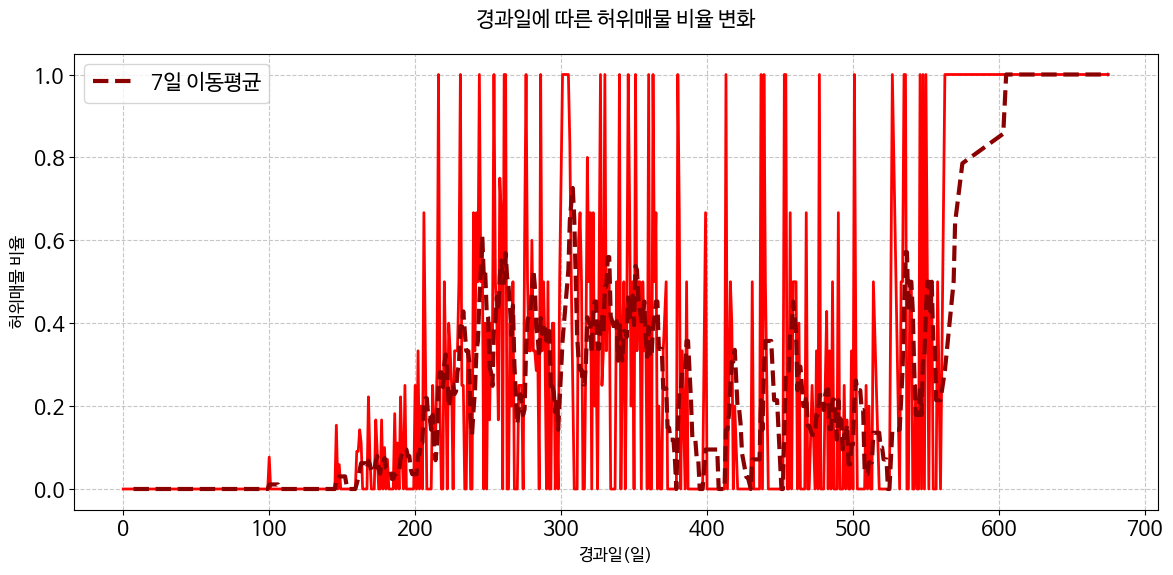

In [ ]:
# 경과일별 허위매물 비율 계산
fraud_by_days = train.groupby('경과일')['허위매물여부'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(12, 6))
sns.lineplot(x='경과일', y='허위매물여부', data=fraud_by_days,
             color='red', linewidth=2)

# 그래프 꾸미기
plt.title('경과일에 따른 허위매물 비율 변화', fontsize=15, pad=20)
plt.xlabel('경과일(일)', fontsize=12)
plt.ylabel('허위매물 비율', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 이동평균 추가 (추세선을 부드럽게)
fraud_by_days['moving_avg'] = fraud_by_days['허위매물여부'].rolling(7).mean()
sns.lineplot(x='경과일', y='moving_avg', data=fraud_by_days,
             color='darkred', linewidth=3, linestyle='--',
             label='7일 이동평균')

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-22-52da9a6667d5>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_result = grouped_data.groupby('경과일_그룹')['허위매물여부'].mean().reset_index()
<ipython-input-22-52da9a6667d5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='경과일_그룹', y='허위매물여부', data=grouped_result,


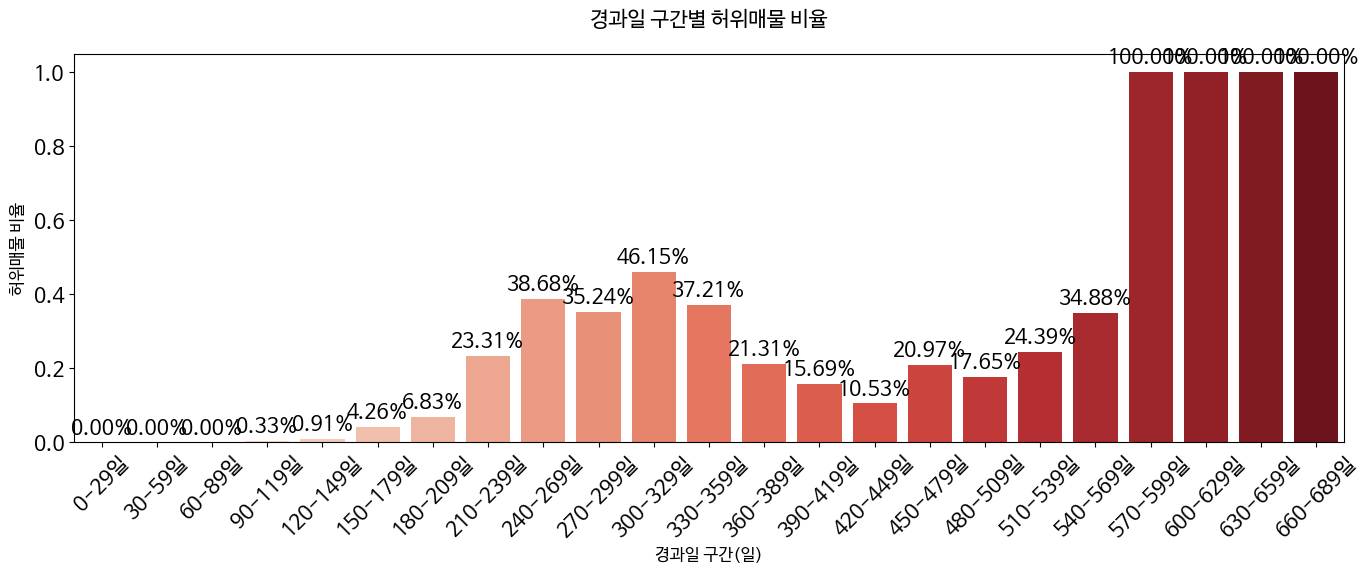

In [ ]:
# 시각화만을 위한 자료
grouped_data = train[['경과일', '허위매물여부']].copy()

# 경과일을 30일 단위로 그룹화
bins = range(0, grouped_data['경과일'].max()+30, 30)
labels = [f"{i}-{i+29}일" for i in bins[:-1]]
grouped_data['경과일_그룹'] = pd.cut(grouped_data['경과일'], bins=bins, labels=labels, right=False)

# 그룹별 허위매물 비율 계산
grouped_result = grouped_data.groupby('경과일_그룹')['허위매물여부'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='경과일_그룹', y='허위매물여부', data=grouped_result,
                 palette='Reds')

# 그래프 꾸미기
plt.title('경과일 구간별 허위매물 비율', fontsize=15, pad=20)
plt.xlabel('경과일 구간(일)', fontsize=12)
plt.ylabel('허위매물 비율', fontsize=12)
plt.xticks(rotation=45)

# 각 막대에 비율 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
'''
# 경과일을 30일 단위로 그룹화


train['경과일_그룹'] = pd.cut(train['경과일'],
                           bins=range(0, train['경과일'].max()+30, 30),
                           right=False)

# 그룹별 허위매물 비율 계산
grouped = train.groupby('경과일_그룹')['허위매물여부'].mean().reset_index()
grouped['경과일_그룹'] = grouped['경과일_그룹'].astype(str)

# 그래프 그리기
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='경과일_그룹', y='허위매물여부', data=grouped,
                 palette='Reds')

# 그래프 꾸미기
plt.title('경과일 구간별 허위매물 비율', fontsize=15, pad=20)
plt.xlabel('경과일 구간(일)', fontsize=12)
plt.ylabel('허위매물 비율', fontsize=12)
plt.xticks(rotation=45)

# 각 막대에 비율 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()
'''

"\n# 경과일을 30일 단위로 그룹화\n\n\ntrain['경과일_그룹'] = pd.cut(train['경과일'],\n                           bins=range(0, train['경과일'].max()+30, 30),\n                           right=False)\n\n# 그룹별 허위매물 비율 계산\ngrouped = train.groupby('경과일_그룹')['허위매물여부'].mean().reset_index()\ngrouped['경과일_그룹'] = grouped['경과일_그룹'].astype(str)\n\n# 그래프 그리기\nplt.figure(figsize=(14, 6))\nax = sns.barplot(x='경과일_그룹', y='허위매물여부', data=grouped,\n                 palette='Reds')\n\n# 그래프 꾸미기\nplt.title('경과일 구간별 허위매물 비율', fontsize=15, pad=20)\nplt.xlabel('경과일 구간(일)', fontsize=12)\nplt.ylabel('허위매물 비율', fontsize=12)\nplt.xticks(rotation=45)\n\n# 각 막대에 비율 표시\nfor p in ax.patches:\n    ax.annotate(f'{p.get_height():.2%}',\n                (p.get_x() + p.get_width() / 2., p.get_height()),\n                ha='center', va='center',\n                xytext=(0, 10),\n                textcoords='offset points')\n\nplt.tight_layout()\nplt.show()\n"

In [ ]:
# 위험도 feature 추가
fraud_rates = train.groupby('중개사무소')['허위매물여부'].mean() # 비율계산
train['위험도'] = train['중개사무소'].map(fraud_rates)
test['위험도'] = test['중개사무소'].map(fraud_rates)

<ipython-input-25-f520cde67e3b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_fraud_offices.values, y=top_fraud_offices.index, palette='Reds_r')


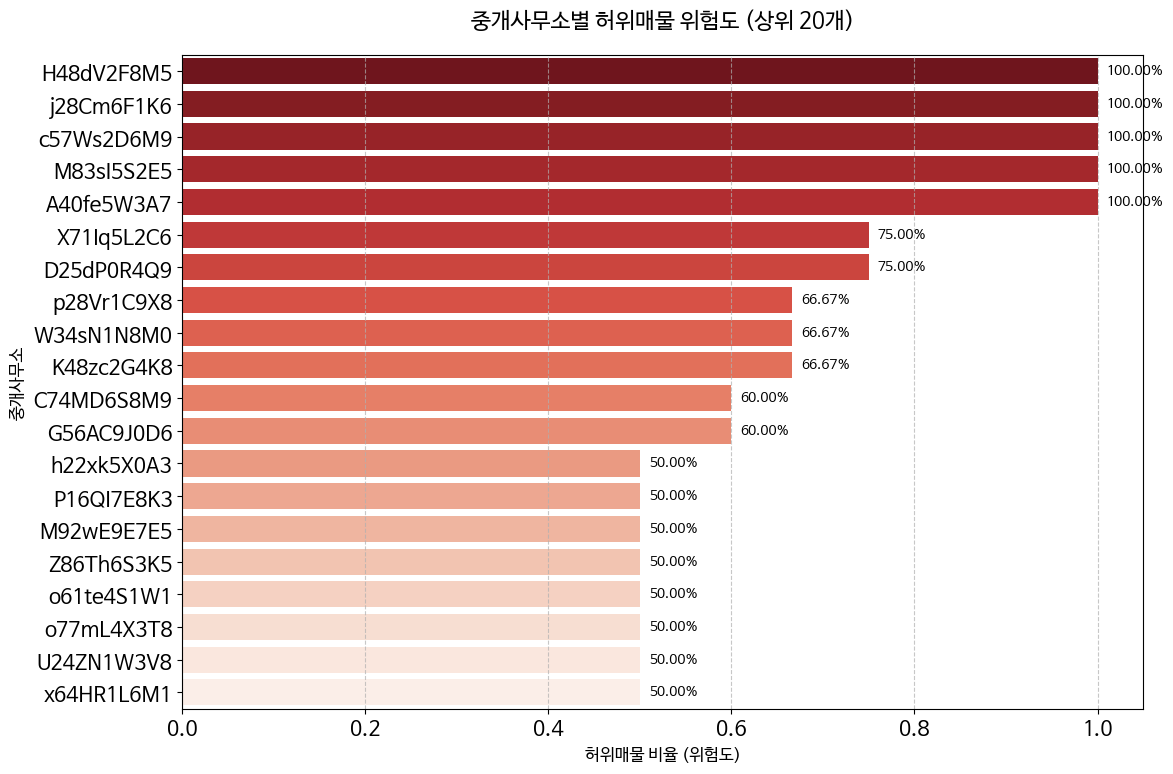

In [ ]:
# 위험도가 높은 상위 20개 중개사무소 추출 (전체를 보려면 이 부분 제거)
sort_fraud = train.groupby('중개사무소')['허위매물여부'].mean().sort_values(ascending=False)
top_fraud_offices = sort_fraud.head(20)

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_fraud_offices.values, y=top_fraud_offices.index, palette='Reds_r')

# 그래프 제목 및 축 레이블 설정
plt.title('중개사무소별 허위매물 위험도 (상위 20개)', fontsize=16, pad=20)
plt.xlabel('허위매물 비율 (위험도)', fontsize=12)
plt.ylabel('중개사무소', fontsize=12)

# 각 바에 수치 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height()/2.,
             f'{width:.2%}',
             ha='left', va='center', fontsize=10)

# 그리드 추가
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2445 entries, 1 to 2451
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2445 non-null   object 
 1   매물확인방식  2445 non-null   object 
 2   보증금     2445 non-null   float64
 3   월세      2445 non-null   int64  
 4   전용면적    2445 non-null   float64
 5   방향      2445 non-null   object 
 6   주차가능여부  2445 non-null   object 
 7   총주차대수   2445 non-null   float64
 8   관리비     2445 non-null   float64
 9   중개사무소   2445 non-null   object 
 10  제공플랫폼   2445 non-null   object 
 11  허위매물여부  2445 non-null   int64  
 12  방개수     2445 non-null   float64
 13  층수비율    2445 non-null   float64
 14  년월      2445 non-null   int32  
 15  일       2445 non-null   int32  
 16  경과일     2445 non-null   int64  
 17  위험도     2445 non-null   float64
dtypes: float64(7), int32(2), int64(3), object(6)
memory usage: 408.4+ KB


##03-3: Feature Encoding & Scaling
- enable_categorical=True 사용시 scaling 불필요


In [ ]:
# (1)라벨 인코딩
label_encode_cols = ['중개사무소','제공플랫폼','방향', '매물확인방식', '주차가능여부']

label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    label_encoders[col] = le

train.head()

,ID,매물확인방식,보증금,월세,전용면적,방향,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,허위매물여부,방개수,층수비율,년월,일,경과일,위험도
1,TRAIN_0001,2,170500000.0,200000,29.93,0,1,2.397895,0.000000,228,3,0,3.0,0.750000,202412,26,67,0.000000
2,TRAIN_0002,1,114000000.0,380000,23.14,3,1,2.397895,0.000000,150,0,0,2.0,0.666667,202411,28,95,0.052632
3,TRAIN_0003,2,163500000.0,30000,36.30,0,0,2.639057,2.397895,31,0,0,3.0,0.333333,202411,26,97,0.000000
4,TRAIN_0004,2,346000000.0,530000,29.93,3,1,2.397895,0.000000,72,1,1,3.0,1.000000,202406,25,251,0.055556
5,TRAIN_0005,1,153000000.0,530000,29.50,2,0,0.693147,0.000000,87,0,0,3.0,0.666667,202409,12,172,0.052632


In [ ]:
# train_test split
X = train.drop(['ID','허위매물여부'], axis=1 )
y = train['허위매물여부']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# SMTOEEN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

# 1. SMOTE로 소수 클래스 샘플 오버샘플링
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. ENN을 사용하여 노이즈 제거
enn = EditedNearestNeighbours(n_neighbors=3)
X_train_res, y_train_res = enn.fit_resample(X_train_res, y_train_res)

<ipython-input-41-d548383bb343>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train_res, palette='pastel')


Before SMOTEENN: 허위매물여부
0    1718
1     238
Name: count, dtype: int64
After SMOTEENN: 허위매물여부
0    711
1    515
Name: count, dtype: int64


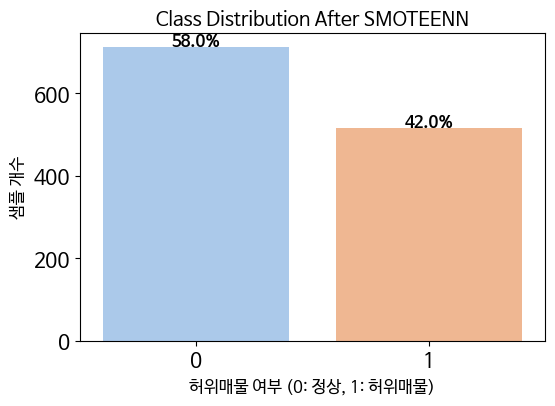

In [ ]:
# SMOTEENN 적용후 데이터 불균형 확인
class_counts = y_train_res.value_counts()
total = len(y_train_res)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_train_res, palette='pastel')

for p in ax.patches:
    height = p.get_height()
    percent = f'{height/total*100:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., height + 5, percent, ha="center", fontsize=12, fontweight="bold")

plt.title("Class Distribution After SMOTEENN", fontsize=14)
plt.xlabel("허위매물 여부 (0: 정상, 1: 허위매물)", fontsize=12)
plt.ylabel("샘플 개수", fontsize=12)


print("Before SMOTEENN:", y_train.value_counts())
print("After SMOTEENN:", y_train_res.value_counts())

##03-4: 상관성 확인

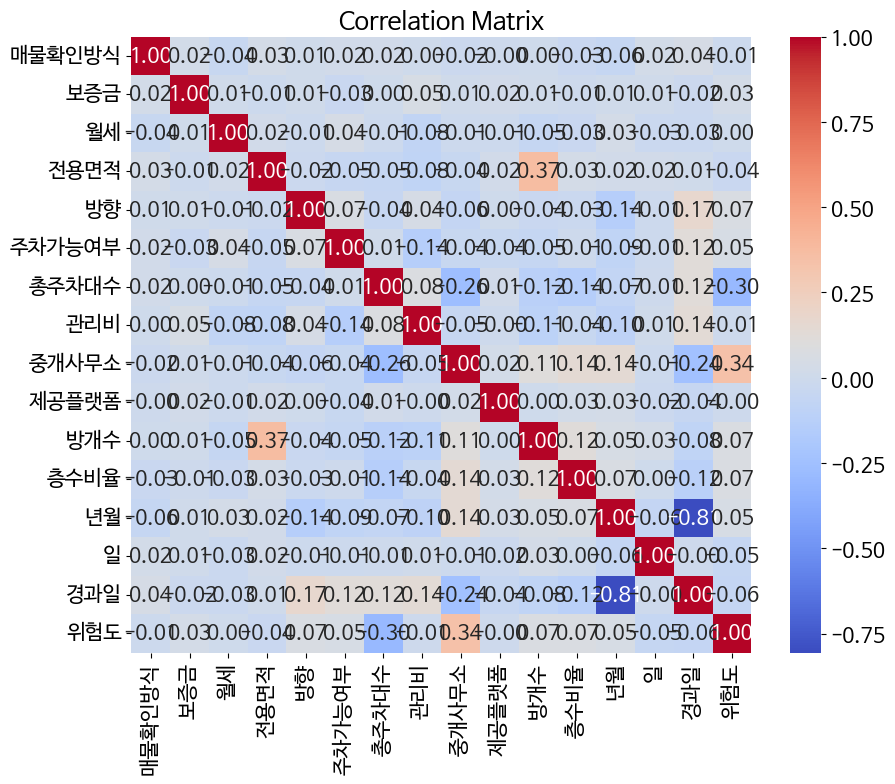

In [ ]:
# 상관관계 히트맵
# 1에 가까울수록: 두 변수 간에 강한 양의 상관관계
# -1에 가까울수록: 두 변수 간에 강한 음의 상관관계
# 0에 가까울수록: 두 변수 간에 상관관계가 거의 없음
# 다중공선성(Multicollinearity) 문제를 피하려는 경우, 상관관계가 너무 큰 변수들은 제거

correlation_matrix = X_train.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#04: 모델링

##04-1 XGBBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV


hyperparam_grid = {
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'min_child_weight': [1,3,5,7],
    'colsample_bytree' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],
    'reg_lambda':[0.1, 1, 5, 10, 50],
    'scale_pos_weight': [1, 10, 25, 50, 100]
 }

# XGBClassifier
clf = XGBClassifier(enable_categorical=True, random_state =0 , use_label_encoder = False, eval_metric = 'logloss')

random = RandomizedSearchCV(estimator=clf, param_distributions= hyperparam_grid, scoring= 'f1_macro', refit=True, n_iter = 60, n_jobs=-1, verbose=1 )
random.fit(X_train_res, y_train_res)


print('Best hyperparams:\n{}'.format(random.best_params_))
print("Best cross-validation score: {:.5f}".format(random.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparams:
{'subsample': 0.5, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': np.float64(0.042222222222222223), 'gamma': 0.5, 'colsample_bytree': 1.0}
Best cross-validation score: 0.96024


In [ ]:
best_model= random.best_estimator_

## 04-2 성능 평가

In [ ]:
y_pred = pd.Series(best_model.predict(X_test))

In [ ]:
# F1 스코어로 평가
from sklearn.metrics import f1_score

# 최적 모델을 사용하여 예측 (클래스 예측)

y_pred_class = best_model.predict(X_test)

# F1 Score 계산
f1 = f1_score(y_test, y_pred_class, average='weighted')  # 다중 클래스면 'weighted' 추천
print("F1 Score:", f1)

F1 Score: 0.9878163005768394


In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

# K-Fold 실행
for train_idx, val_idx in kf.split(X_train_res, y_train_res):
    X_train_fold, X_val_fold = X_train_res.iloc[train_idx], X_train_res.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_res.iloc[train_idx], y_train_res.iloc[val_idx]

    best_model.fit(X_train_fold, y_train_fold)

    y_val_pred = best_model.predict(X_val_fold)

    f1 = f1_score(y_val_fold, y_val_pred, average='weighted')
    f1_scores.append(f1)

    print(f"Fold F1 Score: {f1:.4f}")

mean_f1_score = np.mean(f1_scores)
print(f"\nMean F1 Score (K-Fold): {mean_f1_score:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold F1 Score: 0.9647


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold F1 Score: 0.9647


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold F1 Score: 0.9614


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold F1 Score: 0.9586


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold F1 Score: 0.9586

Mean F1 Score (K-Fold): 0.9616


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_train_res, y_train_res, cv=cv, scoring='f1_macro')

print(f'교차 검증 f1_macro: {cv_scores}')
print(f'평균 f1_macro: {cv_scores.mean():.4f}')

# 교차 검증 예측 수행
y_pred = cross_val_predict(best_model, X_train_res ,y_train_res, cv=cv)

print("Classification Evaluation:")
print(classification_report(y_train_res, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

교차 검증 f1_macro: [0.96341727 0.96349605 0.95976301 0.95703962 0.95713768]
평균 f1_macro: 0.9602


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Classification Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1006
           1       0.95      0.95      0.95       686

    accuracy                           0.96      1692
   macro avg       0.96      0.96      0.96      1692
weighted avg       0.96      0.96      0.96      1692



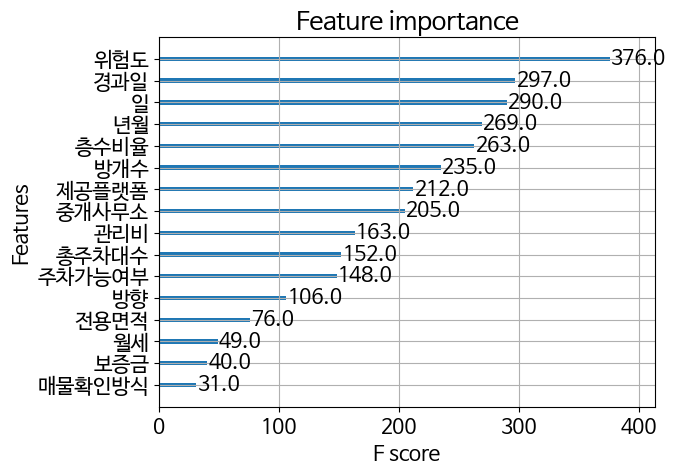

In [ ]:
from xgboost import plot_importance

ax = plot_importance(best_model, importance_type='weight', max_num_features=len(X_train_res.columns))
ax.set_yticklabels(X_train_res.columns)

plt.show()

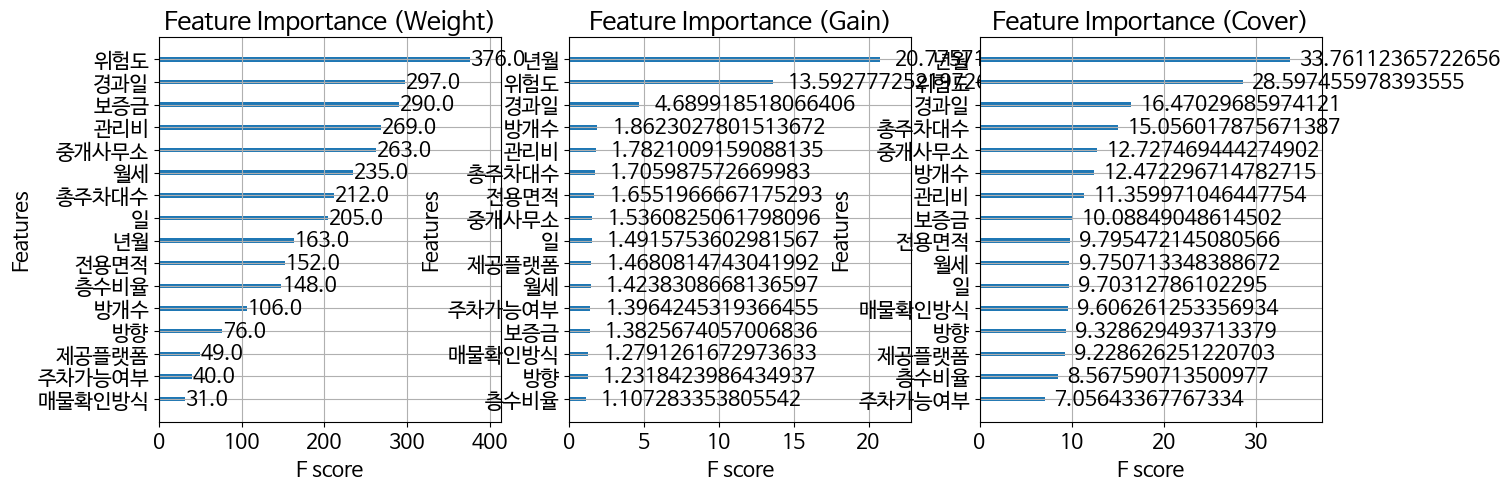

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plot_importance(best_model, importance_type="weight", ax=ax[0])
ax[0].set_title("Feature Importance (Weight)")

plot_importance(best_model, importance_type="gain", ax=ax[1])
ax[1].set_title("Feature Importance (Gain)")

plot_importance(best_model, importance_type="cover", ax=ax[2])
ax[2].set_title("Feature Importance (Cover)")

plt.show()

# 05. 데이콘 제출

In [ ]:
# SMTOEEN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

# 1. SMOTE로 소수 클래스 샘플 오버샘플링
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 2. ENN을 사용하여 노이즈 제거
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_res, y_res)

<ipython-input-60-ad1aab29930a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_res, palette='pastel')


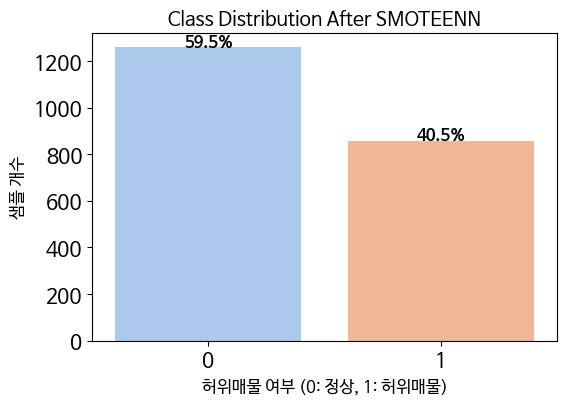

Before SMOTENEN: 허위매물여부
0    1718
1     238
Name: count, dtype: int64
After SMOTEENN: 허위매물여부
0    1258
1     858
Name: count, dtype: int64


In [ ]:
# SMOTEENN 적용후 데이터 불균형 확인
class_counts = y_res.value_counts()
total = len(y_res)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_res, palette='pastel')

for p in ax.patches:
    height = p.get_height()
    percent = f'{height/total*100:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., height + 5, percent, ha="center", fontsize=12, fontweight="bold")

plt.title("Class Distribution After SMOTEENN", fontsize=14)
plt.xlabel("허위매물 여부 (0: 정상, 1: 허위매물)", fontsize=12)
plt.ylabel("샘플 개수", fontsize=12)

plt.show()

print("Before SMOTENEN:", y_train.value_counts())
print("After SMOTEENN:", y_res.value_counts())

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

X_train_res, X_valid, y_train_res, y_valid = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

hyperparam_grid = {
    'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'min_child_weight': [1,3,5,7],
    'colsample_bytree' : [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],
    'reg_lambda':[0.1, 1, 5, 10, 50],
    'scale_pos_weight': [1, 10, 25, 50, 100],
    'max_delta_step': [0, 1, 5, 10]
 }


# XGBClassifier
clf = XGBClassifier(enable_categorical=True, random_state =0 , use_label_encoder = False, eval_metric = 'logloss')

random = RandomizedSearchCV(estimator=clf, param_distributions= hyperparam_grid, scoring= 'f1_macro', cv=cv, refit=True, n_iter = 60, n_jobs=-1, verbose=1 )
random.fit(X_res, y_res)


print('Best hyperparams:\n{}'.format(random.best_params_))
print("Best cross-validation score: {:.5f}".format(random.best_score_))


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparams:
{'subsample': 0.5, 'scale_pos_weight': 10, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 11, 'max_delta_step': 10, 'learning_rate': np.float64(0.3), 'gamma': 0.1, 'colsample_bytree': 0.6}
Best cross-validation score: 0.95427


In [ ]:
best_model= random.best_estimator_

In [ ]:
test.head()

,ID,매물확인방식,보증금,월세,전용면적,방향,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,방개수,층수비율,년월,일,경과일,위험도
0,TEST_000,서류확인,223000000.0,530000,NaN,남향,불가능,NaN,2.079442,Z86Th6S3K5,D플랫폼,2.0,1.000000,202410,21,133,0.500000
1,TEST_001,서류확인,150500000.0,590000,30.26,서향,불가능,2.833213,2.484907,G52Iz8V2B9,D플랫폼,2.0,0.636364,202309,2,548,0.000000
2,TEST_002,현장확인,47000000.0,200000,41.50,남서향,불가능,NaN,0.000000,N45gM0M7R0,B플랫폼,3.0,0.666667,202404,3,334,0.055556
3,TEST_003,서류확인,133000000.0,250000,31.35,남향,가능,NaN,1.791759,C41wx1K6U9,B플랫폼,3.0,0.833333,202409,19,165,0.000000
4,TEST_004,현장확인,108000000.0,380000,23.14,남향,불가능,NaN,0.000000,Z68ZJ6F6L4,A플랫폼,2.0,0.666667,202411,10,113,0.111111


In [ ]:
# 최종 test 데이터
# Label encoding
label_encode_cols = ['중개사무소','제공플랫폼','방향', '매물확인방식', '주차가능여부']

label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col].astype(str))
    label_encoders[col] = le

test.head()

,ID,매물확인방식,보증금,월세,전용면적,방향,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,방개수,층수비율,년월,일,경과일,위험도
0,TEST_000,0,223000000.0,530000,NaN,2,1,NaN,2.079442,105,3,2.0,1.000000,202410,21,133,0.500000
1,TEST_001,0,150500000.0,590000,30.26,7,1,2.833213,2.484907,19,3,2.0,0.636364,202309,2,548,0.000000
2,TEST_002,2,47000000.0,200000,41.50,1,1,NaN,0.000000,52,1,3.0,0.666667,202404,3,334,0.055556
3,TEST_003,0,133000000.0,250000,31.35,2,0,NaN,1.791759,8,1,3.0,0.833333,202409,19,165,0.000000
4,TEST_004,2,108000000.0,380000,23.14,2,1,NaN,0.000000,102,0,2.0,0.666667,202411,10,113,0.111111


In [ ]:
test= test.drop('ID', axis=1)
pred = pd.Series(best_model.predict(test))

submit['허위매물여부'] = pred
submit.to_csv('final_12(label).csv',index=False)
submit['허위매물여부'].sum()

np.int64(92)

In [ ]:
# 파일 저장
from google.colab import files
files.download('final_12(label).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>